In [7]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


# Исследование нормального распределения


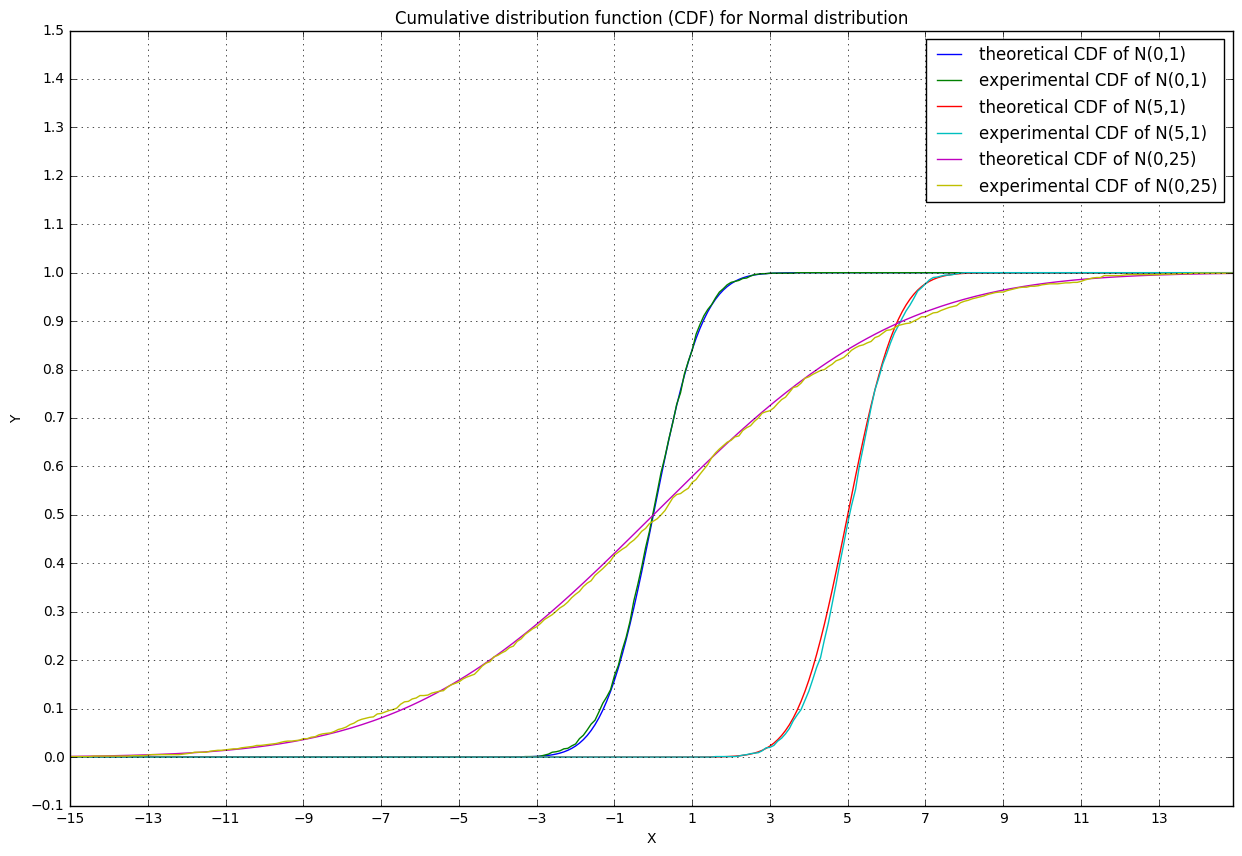

In [8]:
#!/usr/bin/env python 

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from norm_lib import NormDistribution 

X_MIN, X_MAX = -15, 15
Y_MIN, Y_MAX = float(.0), float(1.0)
X_FUNC_STEP = 0.1
X_FUNC = np.arange(X_MIN, X_MAX, X_FUNC_STEP)
IMG_X_SIZE, IMG_Y_SIZE = 15, 10
X_GRID_STEP = (X_MAX - X_MIN) / float(IMG_X_SIZE)
Y_GRID_STEP = (Y_MAX - Y_MIN) / float(IMG_Y_SIZE)
Y_GRID = np.arange(Y_MIN - Y_GRID_STEP, Y_MAX * 1.5 + Y_GRID_STEP, Y_GRID_STEP)
X_GRID = np.arange(X_MIN, X_MAX, X_GRID_STEP)


fig = plt.figure(figsize=(IMG_X_SIZE, IMG_Y_SIZE))
plt.title("Cumulative distribution function (CDF) for Normal distribution")
for median, dispersion in [(0, 1), (5, 1), (0, 25)]:
    norm_distribution = NormDistribution(median, dispersion)
    plt.plot(X_FUNC, norm_distribution.cdf(X_FUNC), label="theoretical CDF of %s" % norm_distribution)
    plt.plot(X_FUNC, norm_distribution.ecdf(X_FUNC), label="experimental CDF of %s" % norm_distribution)
    plt.xticks(X_GRID)
    plt.yticks(Y_GRID)
    plt.legend()

    plt.xlabel("X")
    plt.ylabel("Y")
    
    plt.grid(True)
plt.show()

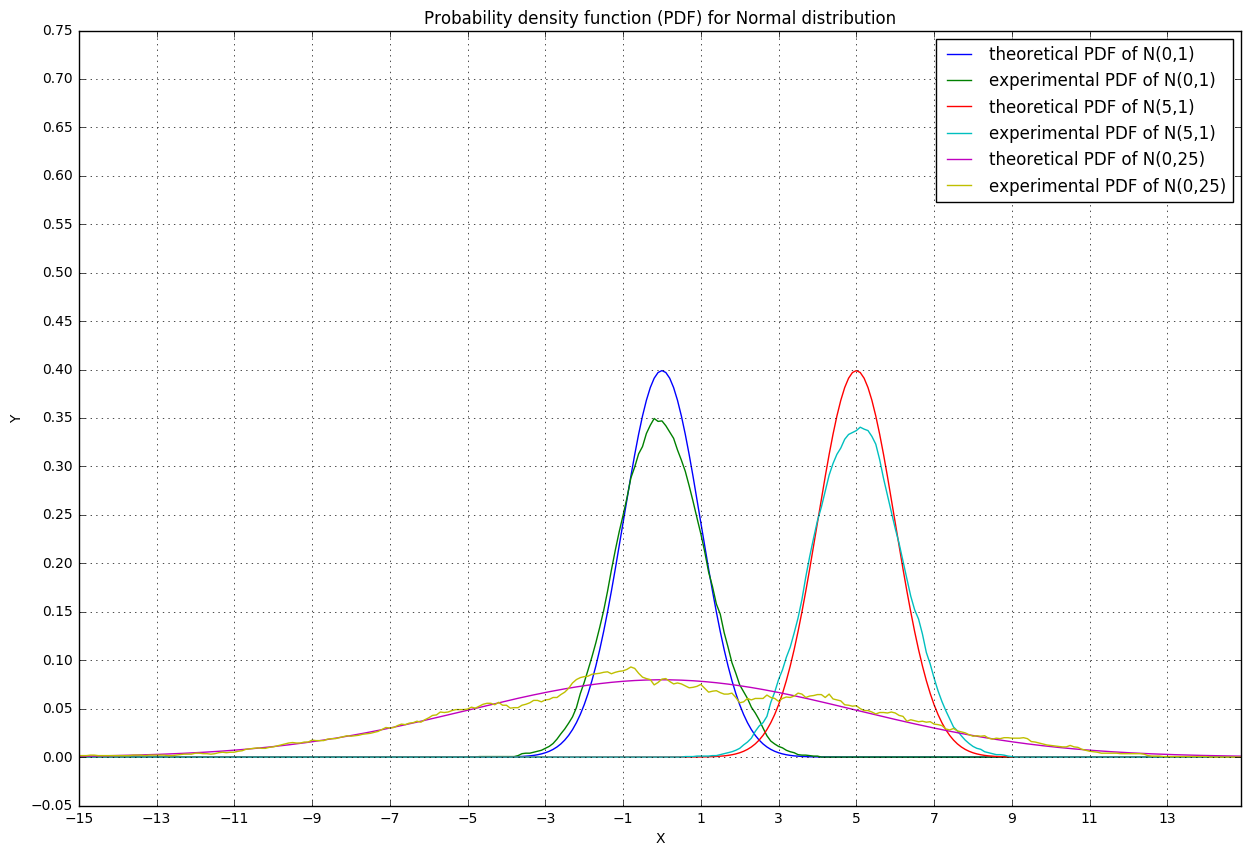

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from norm_lib import NormDistribution 

X_MIN, X_MAX = -15, 15
Y_MIN, Y_MAX = float(.0), float(.5)
X_FUNC_STEP = 0.1
X_FUNC = np.arange(X_MIN, X_MAX, X_FUNC_STEP)
IMG_X_SIZE, IMG_Y_SIZE = 15, 10
X_GRID_STEP = (X_MAX - X_MIN) / float(IMG_X_SIZE)
Y_GRID_STEP = (Y_MAX - Y_MIN) / float(IMG_Y_SIZE)
Y_GRID = np.arange(Y_MIN - Y_GRID_STEP, Y_MAX * 1.5 + Y_GRID_STEP, Y_GRID_STEP)
X_GRID = np.arange(X_MIN, X_MAX, X_GRID_STEP)

fig = plt.figure(figsize=(IMG_X_SIZE, IMG_Y_SIZE))
plt.title("Probability density function (PDF) for Normal distribution")
for median, dispersion in [(0, 1), (5, 1), (0, 25)]:
    norm_distribution = NormDistribution(median, dispersion, None)
    plt.plot(X_FUNC, norm_distribution.pdf(X_FUNC), label="theoretical PDF of %s" % norm_distribution)
    plt.plot(X_FUNC, norm_distribution.epdf(X_FUNC), label="experimental PDF of %s" % norm_distribution)
    plt.xticks(X_GRID)
    plt.yticks(Y_GRID)
    plt.legend()

    plt.xlabel("X")
    plt.ylabel("Y")
    
    plt.grid(True)
plt.show()

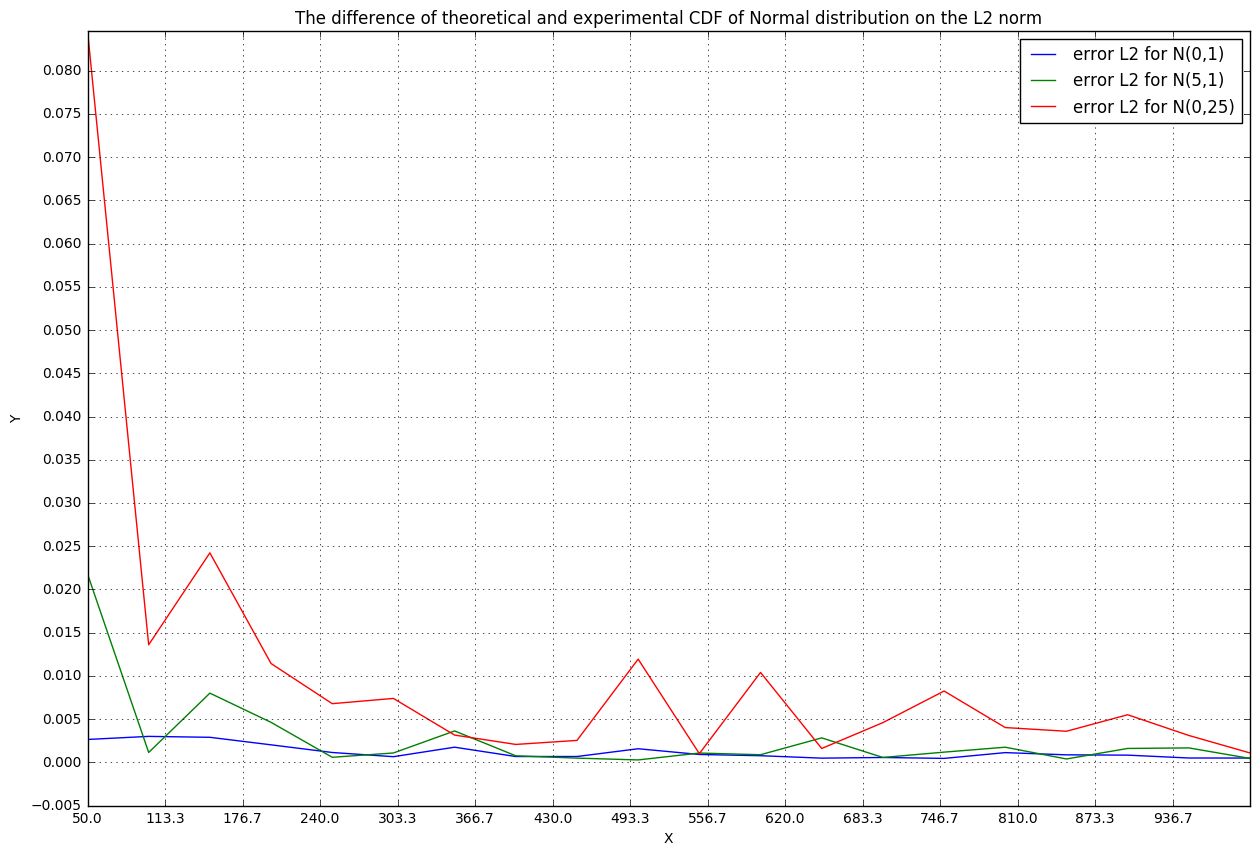

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.integrate import quad
from norm_lib import NormDistribution

X_MIN, X_MAX = float(50), float(1000)
Y_MIN, Y_MAX = float(.0), float(.05)
X_FUNC_STEP = 50
X_FUNC = np.arange(X_MIN, X_MAX, X_FUNC_STEP)
IMG_X_SIZE, IMG_Y_SIZE = 15, 10
X_GRID_STEP = (X_MAX - X_MIN) / float(IMG_X_SIZE)
Y_GRID_STEP = (Y_MAX - Y_MIN) / float(IMG_Y_SIZE)
Y_GRID = np.arange(Y_MIN - Y_GRID_STEP, Y_MAX * 1.5 + Y_GRID_STEP, Y_GRID_STEP)
X_GRID = np.arange(X_MIN, X_MAX, X_GRID_STEP)
X_START, X_END = -15, 15


def sample_size_func(distr, sample_size):
    sample = distr.gen_sample(sample_size)
    f1 = lambda x: norm_distribution.ecdf_in_point(x, sample)
    f2 = lambda x: norm_distribution.cdf_in_point(x)
    return quad(lambda x: (f1(x) - f2(x)) ** 2, X_START, X_END)[0]


fig = plt.figure(figsize=(IMG_X_SIZE, IMG_Y_SIZE))
plt.title("The difference of theoretical and experimental CDF of Normal distribution on the L2 norm")
for median, dispersion in [(0, 1), (5, 1), (0, 25)]:
    norm_distribution = NormDistribution(median, dispersion, None)

    sample_size_array = np.arange(int(X_MIN), int(X_MAX + X_FUNC_STEP), int(X_FUNC_STEP))
    vectorised_func = np.vectorize(lambda size: sample_size_func(norm_distribution, size))
    distance_array = vectorised_func(sample_size_array)

    # print sample_size_dict
    plt.plot(sample_size_array, distance_array, label="error L2 for %s" % norm_distribution)
    # plt.plot(X_FUNC, norm_distribution.epdf(X_FUNC), color=experimental_color)
    plt.xticks(X_GRID)
    plt.yticks(Y_GRID)
    plt.legend()

    plt.xlabel("X")
    plt.ylabel("Y")

    plt.grid(True)
plt.show()

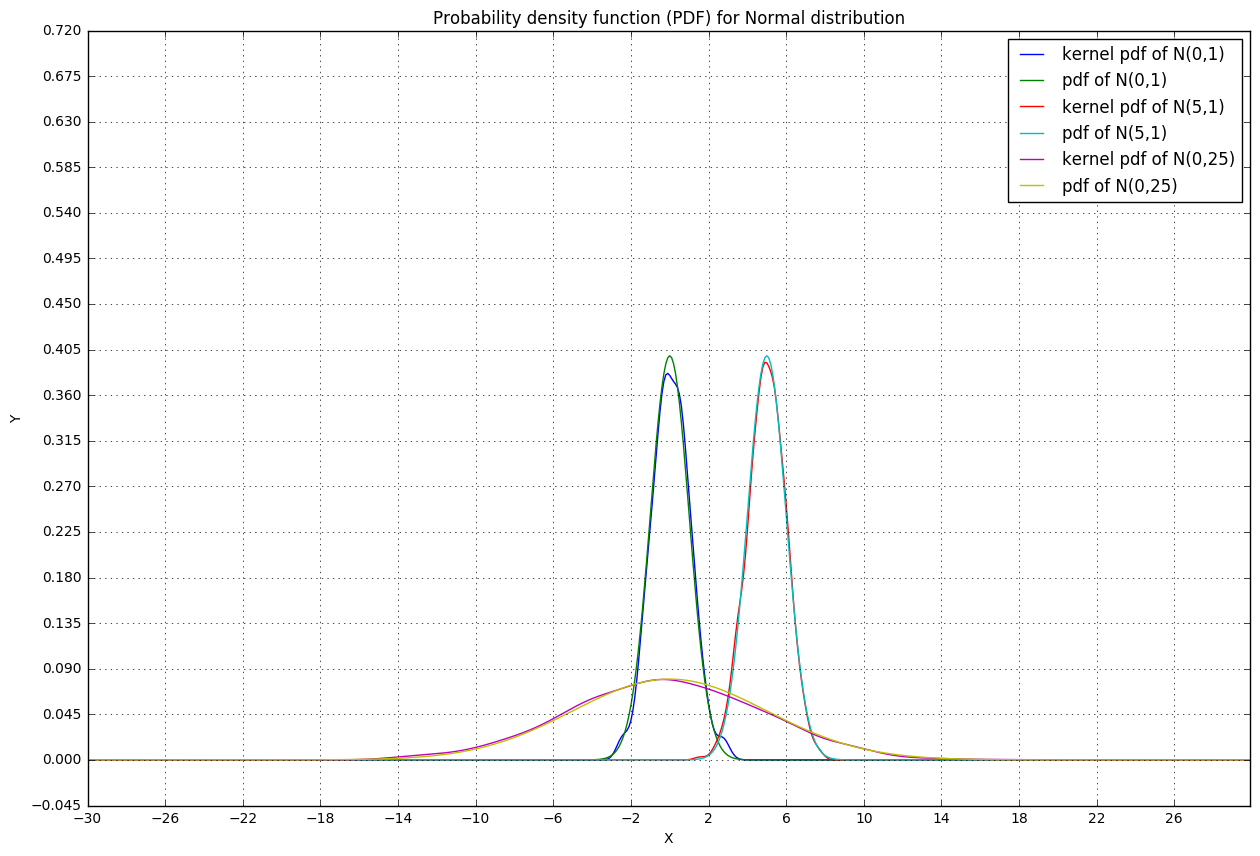

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.integrate import quad
from norm_lib import NormDistribution 

X_MIN, X_MAX = -30, 30
Y_MIN, Y_MAX = float(.0), float(.45)
X_FUNC_STEP = .1
X_FUNC = np.arange(X_MIN, X_MAX, X_FUNC_STEP)
IMG_X_SIZE, IMG_Y_SIZE = 15, 10
X_GRID_STEP = (X_MAX - X_MIN) / float(IMG_X_SIZE)
Y_GRID_STEP = (Y_MAX - Y_MIN) / float(IMG_Y_SIZE)
Y_GRID = np.arange(Y_MIN - Y_GRID_STEP, Y_MAX * 1.5 + Y_GRID_STEP, Y_GRID_STEP)
X_GRID = np.arange(X_MIN, X_MAX, X_GRID_STEP)


# print "integral = %s" % quad(lambda x: x ** 2, -5., 5.)
fig = plt.figure(figsize=(IMG_X_SIZE, IMG_Y_SIZE))
plt.title("Probability density function (PDF) for Normal distribution")
# for median, dispersion in [(0, 1)]:
for median, dispersion in [(0, 1), (5, 1), (0, 25)]:
    norm_distribution = NormDistribution(median, dispersion, None)
    sample = norm_distribution.gen_sample()
    kernel_pdf = norm_distribution.gauss_kernel(sample)
    pdf_array = kernel_pdf(X_FUNC)
    # print f(X_FUNC)
    # print sample_size_dict
    plt.plot(X_FUNC, pdf_array, label="kernel pdf of " + str(norm_distribution))
    plt.plot(X_FUNC, norm_distribution.pdf(X_FUNC), label="pdf of " + str(norm_distribution))
    plt.xticks(X_GRID)
    plt.yticks(Y_GRID)
    plt.legend()

    plt.xlabel("X")
    plt.ylabel("Y")

    plt.grid(True)
plt.show()

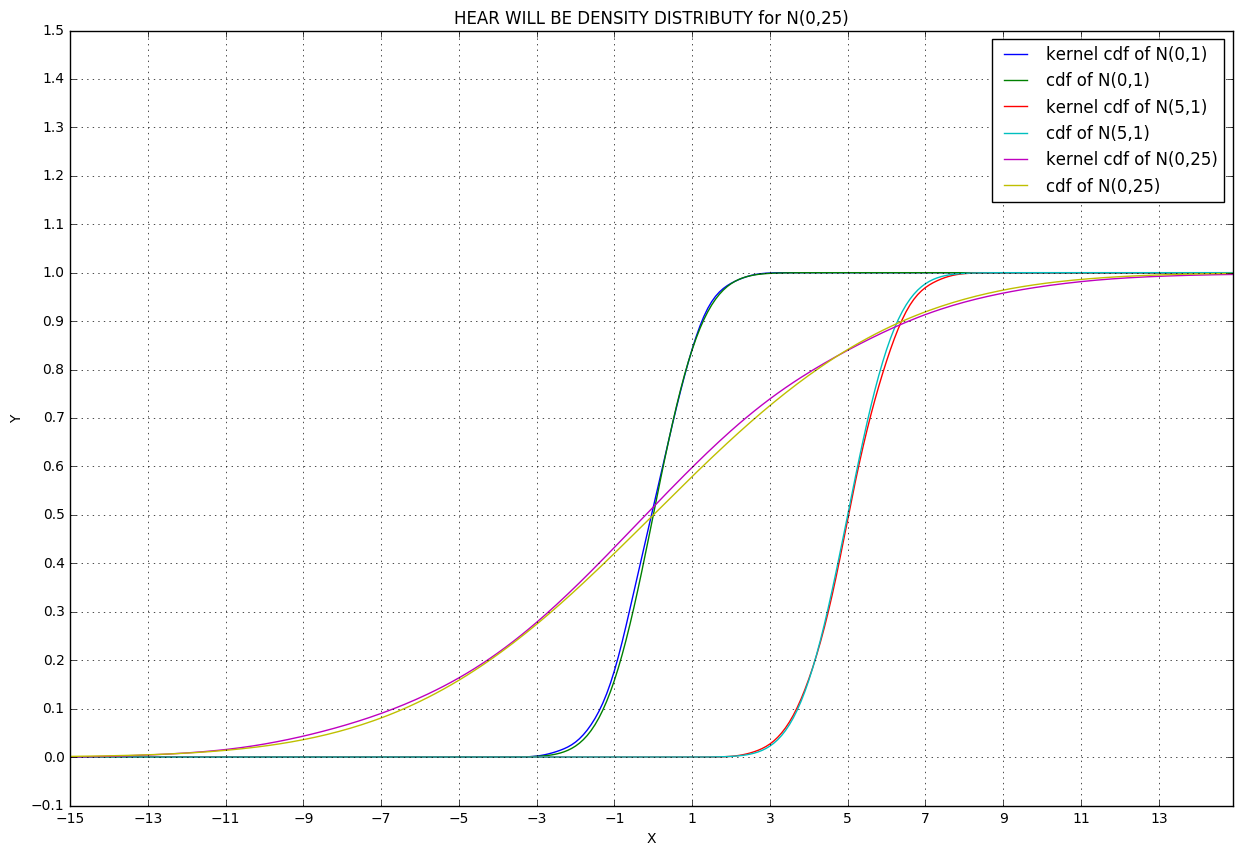

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.integrate import quad
from norm_lib import NormDistribution, integral

X_MIN, X_MAX = float(-15), float(15)
Y_MIN, Y_MAX = float(.0), float(1.)

X_FUNC_STEP = .1
X_FUNC = np.arange(X_MIN, X_MAX, X_FUNC_STEP)
IMG_X_SIZE, IMG_Y_SIZE = 15, 10
X_GRID_STEP = (X_MAX - X_MIN) / float(IMG_X_SIZE)
Y_GRID_STEP = (Y_MAX - Y_MIN) / float(IMG_Y_SIZE)
Y_GRID = np.arange(Y_MIN - Y_GRID_STEP, Y_MAX * 1.5 + Y_GRID_STEP, Y_GRID_STEP)
X_GRID = np.arange(X_MIN, X_MAX, X_GRID_STEP)


fig = plt.figure(figsize=(IMG_X_SIZE, IMG_Y_SIZE))
plt.title("Cumulative distribution function (CDF) for Normal distribution")
for median, dispersion in [(0, 1), (5, 1), (0, 25)]:
    norm_distribution = NormDistribution(median, dispersion, None)
    sample = norm_distribution.gen_sample()
    
    kernel_pdf = norm_distribution.gauss_kernel(sample)
    pdf_array = kernel_pdf(X_FUNC)
    kernel_cdf = np.vectorize(lambda x: quad(kernel_pdf, X_MIN, float(x))[0])
    cdf_array = kernel_cdf(X_FUNC)
    
    plt.plot(X_FUNC, cdf_array, label="kernel cdf of " + str(norm_distribution))
    plt.plot(X_FUNC, norm_distribution.cdf(X_FUNC), label="cdf of " + str(norm_distribution))
    
    plt.xticks(X_GRID)
    plt.yticks(Y_GRID)
    plt.legend()

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
plt.show()

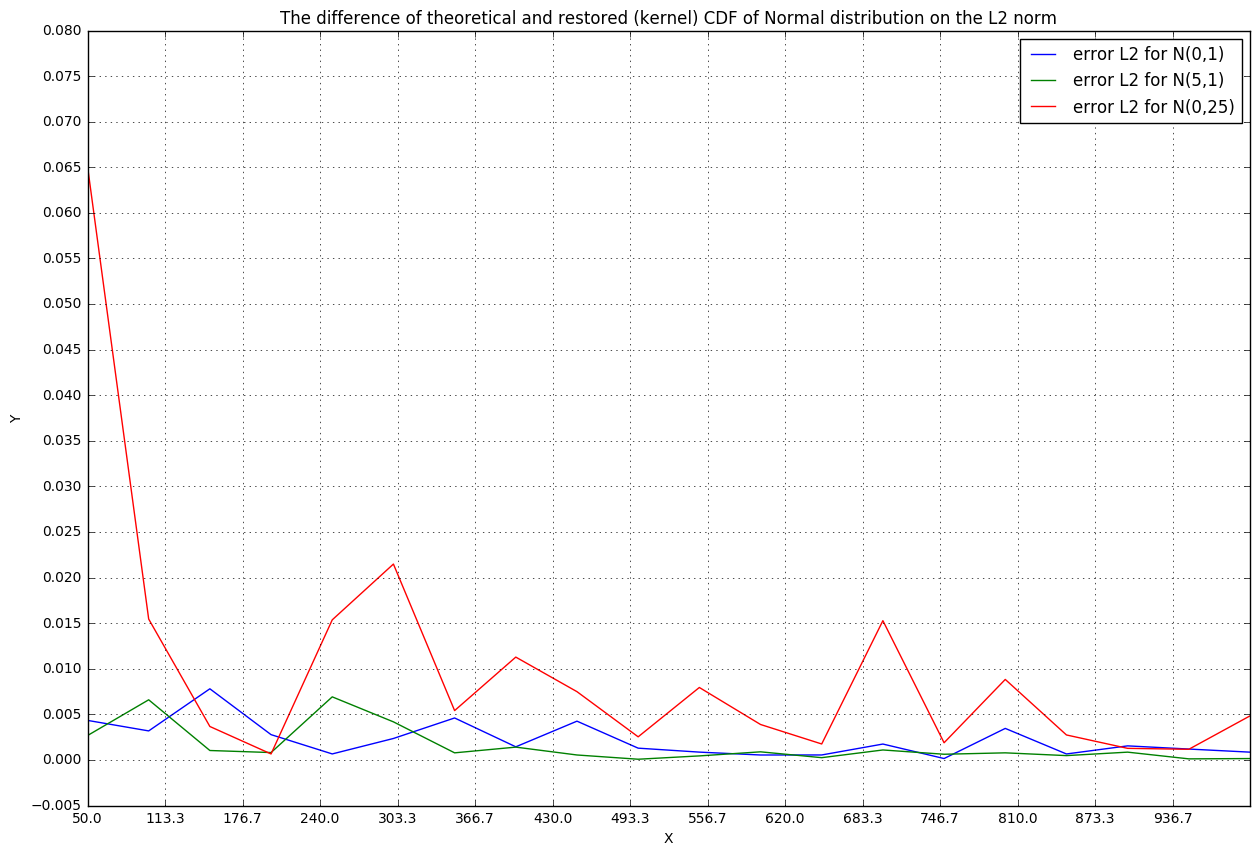

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.integrate import quad
from norm_lib import NormDistribution

X_MIN, X_MAX = float(50), float(1000)
Y_MIN, Y_MAX = float(.0), float(0.05)

X_FUNC_STEP = 50
X_FUNC = np.arange(X_MIN, X_MAX, X_FUNC_STEP)
IMG_X_SIZE, IMG_Y_SIZE = 15, 10
X_GRID_STEP = (X_MAX - X_MIN) / float(IMG_X_SIZE)
Y_GRID_STEP = (Y_MAX - Y_MIN) / float(IMG_Y_SIZE)
Y_GRID = np.arange(Y_MIN - Y_GRID_STEP, Y_MAX * 1.5 + Y_GRID_STEP, Y_GRID_STEP)
X_GRID = np.arange(X_MIN, X_MAX, X_GRID_STEP)

X_START, X_END = -15, 15


def sample_size_func(distr, sample_size):
    sample = distr.gen_sample(sample_size)
    kernel_pdf = norm_distribution.gauss_kernel(sample)
    f1 = lambda x: quad(kernel_pdf, X_START, float(x))[0]
    f2 = lambda x: norm_distribution.cdf_in_point(x)
    return quad(lambda x: (f1(x) - f2(x)) ** 2, X_START, X_END)[0]


fig = plt.figure(figsize=(IMG_X_SIZE, IMG_Y_SIZE))
plt.title("The difference of theoretical and restored (kernel) CDF of Normal distribution on the L2 norm")
for median, dispersion in [(0, 1), (5, 1), (0, 25)]:
    norm_distribution = NormDistribution(median, dispersion, None)
    sample_size_array = np.arange(int(X_MIN), int(X_MAX + X_FUNC_STEP), int(X_FUNC_STEP))
    vectorised_func = np.vectorize(lambda size: sample_size_func(norm_distribution, size))
    distance_array = vectorised_func(sample_size_array)
    plt.plot(sample_size_array, distance_array, label="error L2 for %s" % norm_distribution)
    
    plt.xticks(X_GRID)
    plt.yticks(Y_GRID)
    plt.legend()

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
plt.show()

# Выводы
По графикам зависимости погрешности от размера выборки можно сделать следующие выводы:
- ядровое восстановление функции нормального распределения имеет погрешность сравнимую с погрешностью эмпирической функцией распределения, полученной методом Монте-Карло;
- нормальное распределение с большей диспресией имеет в среднем большую погрешность.
